<a href="https://colab.research.google.com/github/AlejandroVillazonG/MAT269/blob/main/codigos_reporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" width= 800 /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> MAT269 ANÁLISIS ESTADÍSTICO MULTIVARIADO</h1>

<H3 align='center'> CÓDIGOS REPORTE ESTADÍSTICO - 2023-1  </H3>
<hr style="height:2px;border:none"/>

<H3 align='center'> Alejandro Villazón G. </H3>
<hr style="height:2px;border:none"/>

Librerías necesarias:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

Descarga de datos:

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alejandrovillazon","key":"ec3be0ada702ca938581b0dd2cbe5e33"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d rajyellow46/wine-quality

!unzip /content/wine-quality.zip

  0% 0.00/98.0k [00:00<?, ?B/s]
100% 98.0k/98.0k [00:00<00:00, 101MB/s]
Archive:  /content/wine-quality.zip
  inflating: winequalityN.csv        


In [4]:
df = pd.read_csv('/content/winequalityN.csv').drop('type',axis = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Información básica del conjunto de datos:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6487 non-null   float64
 1   volatile acidity      6489 non-null   float64
 2   citric acid           6494 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6488 non-null   float64
 9   sulphates             6493 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [6]:
df.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Observamos que hay 6.497 observaciones y 12 variables, todas del tipo numérica. Además, notamos que el conjunto presenta datos faltantes en algunas columnas (atributos), optamos por rellenar dichos datos con el valor de la media del atributo:

In [7]:
for column in df.columns[df.isnull().sum()>0]:
  df[column] = df[column].fillna(df[column].mean())

A continuación, se presentan los histogramas de los atributos, lo que nos da una idea de las distribuciones de estos:

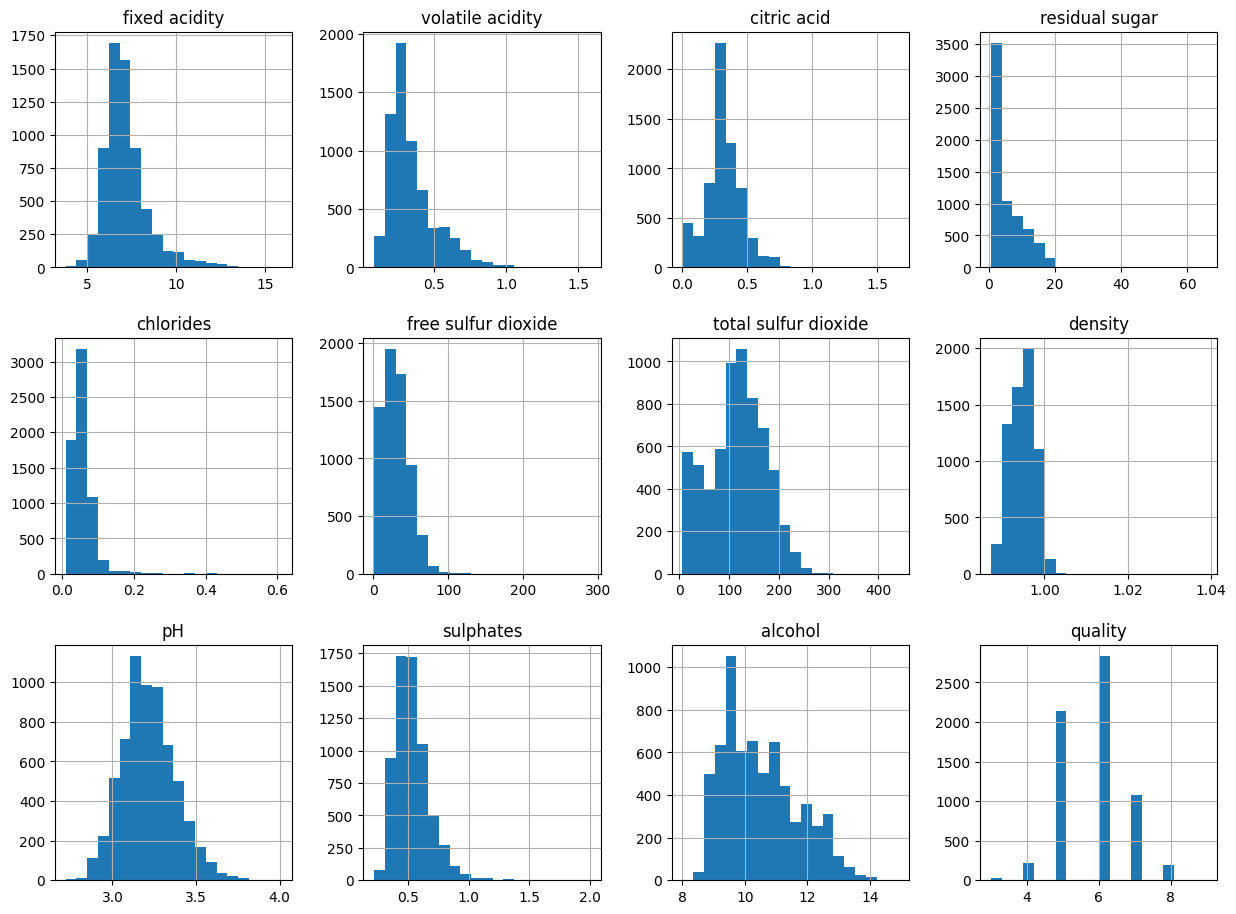

In [8]:
df.hist(figsize=(15,15), layout=(4,4), bins=20);

A continuación, se presenta la correlación entre los atributos:

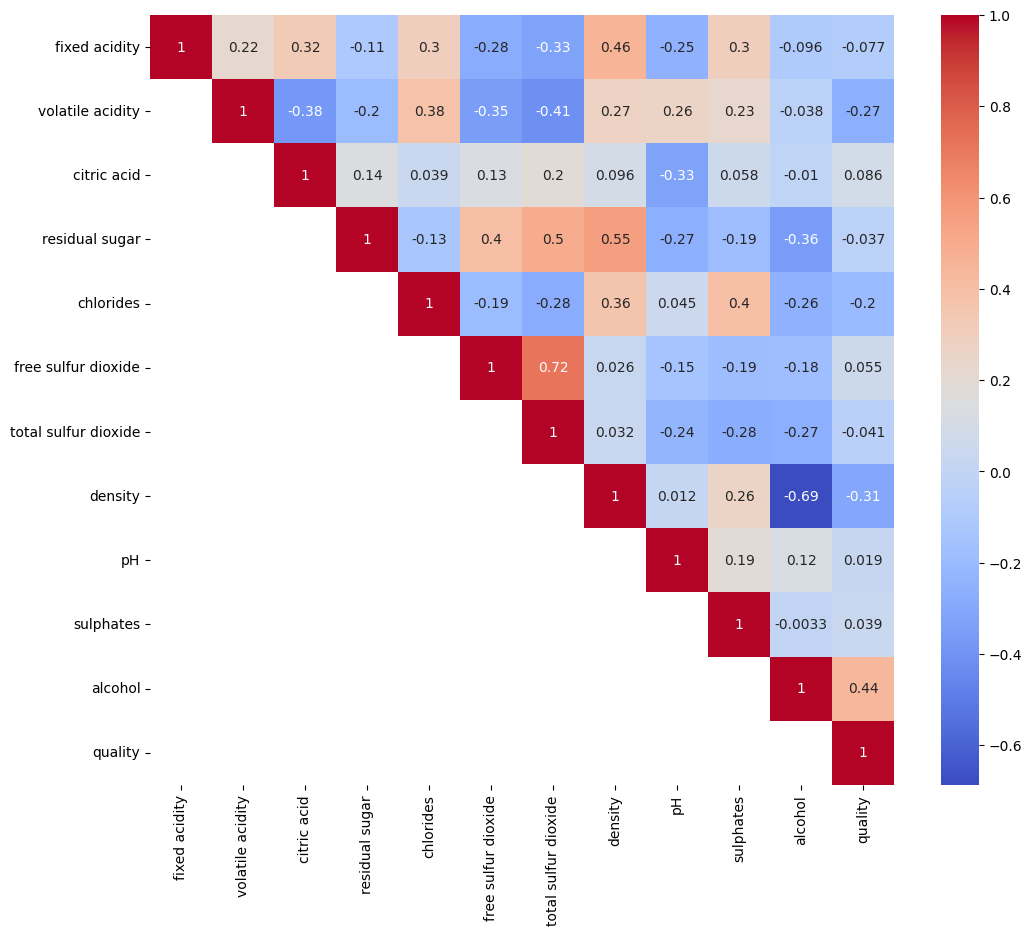

In [9]:
plt.figure(figsize=[12,10])

mask = np.tril(np.ones_like(df.corr(), dtype=bool), k = -1)

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', mask = mask);

Notamos que hay valores altos ($>40\%$ en valor absoluto), lo cual apoya el enfoque de usar PCA en este conjunto de datos.

Separemos el atributo objetivo de los datos:

In [10]:
X = df.drop(['quality'], axis = 1)
y = df['quality']

Antes de aplicar PCA, se debe tener en cuenta los valores de las medias y desviaciones estándar de los atributos, pues si alguno de estos es grande en comparación al resto, dominará en las componentes.

In [12]:
X.describe().T[['mean', 'std']]

,mean,std
fixed acidity,7.216579,1.295751
volatile acidity,0.339691,0.164548
citric acid,0.318722,0.145231
residual sugar,5.444326,4.757392
chlorides,0.056042,0.035031
free sulfur dioxide,30.525319,17.749400
total sulfur dioxide,115.744574,56.521855
density,0.994697,0.002999
pH,3.218395,0.160637
sulphates,0.531215,0.148768


Es evidente la diferencia entre los valores para los distintos atributos, por lo que, antes de aplicar PCA, estandarizaremos los valores:

In [13]:
x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X)

Apliquemos PCA al conjunto de datos centrado y escalado:

In [14]:
pca = PCA()

pca.fit(X_scaled);

Grafiquemos la influencia de las variables en cada componente a través de un gráfico de tipo _heatmap_.

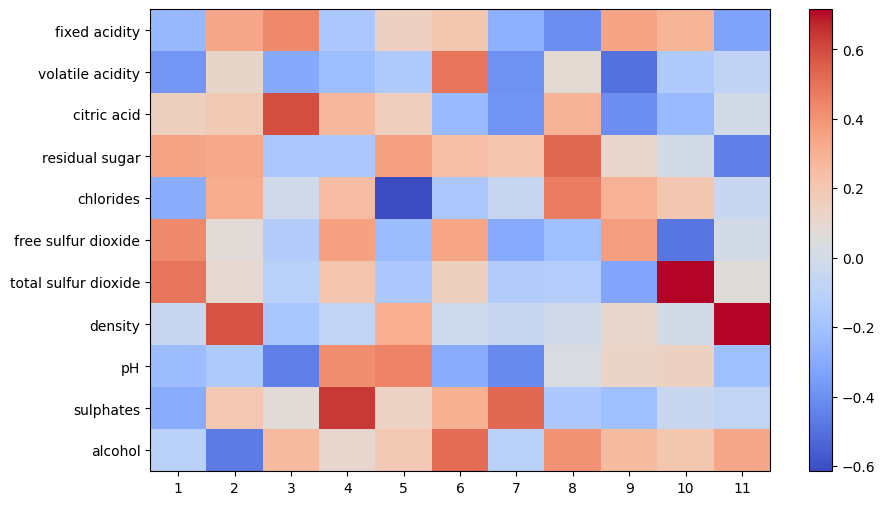

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

plt.imshow(pca.components_.T, cmap='coolwarm', aspect='auto')
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(len(X.columns)), np.arange(pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Grafiquemos el porcentaje de varianza explicada acumulada:

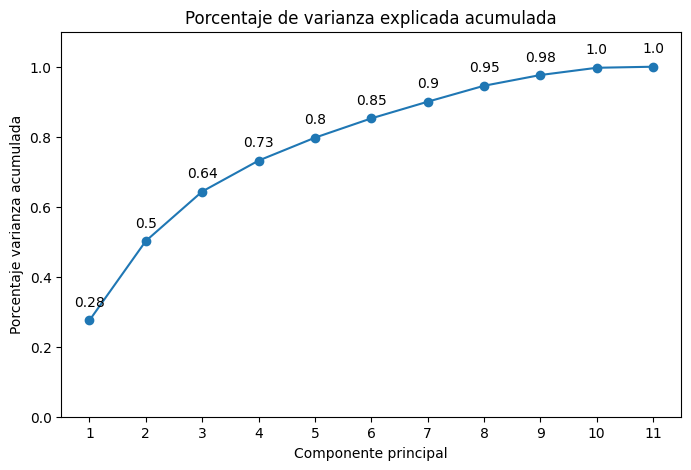

In [16]:
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.plot(
    np.arange(len(X.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje varianza acumulada');